In [51]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from voltage_clamp import IV, Hinf
import os
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
iv_path = r'D:\Lab\Patch Clamp\1063 new\VC\IV'

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_5.asc


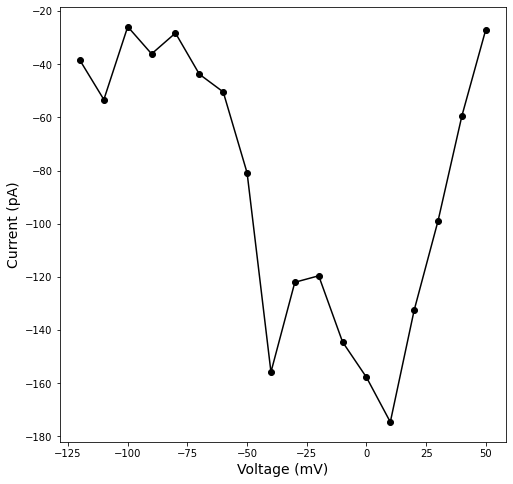

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_6.asc


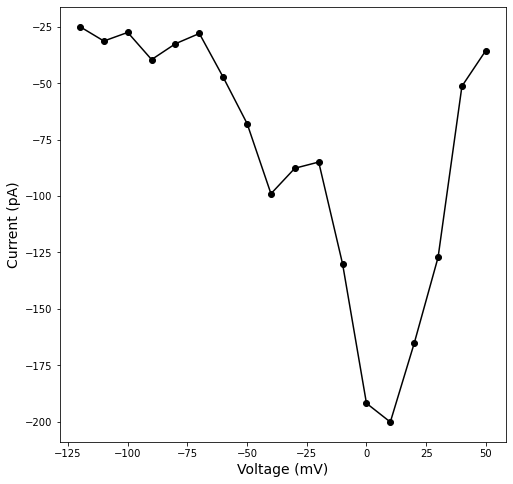

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_7.asc


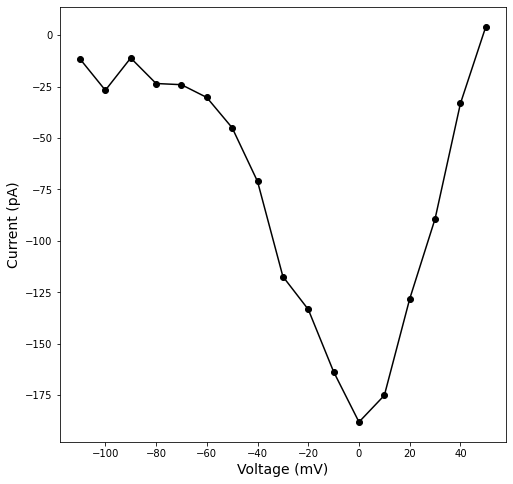

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_8.asc


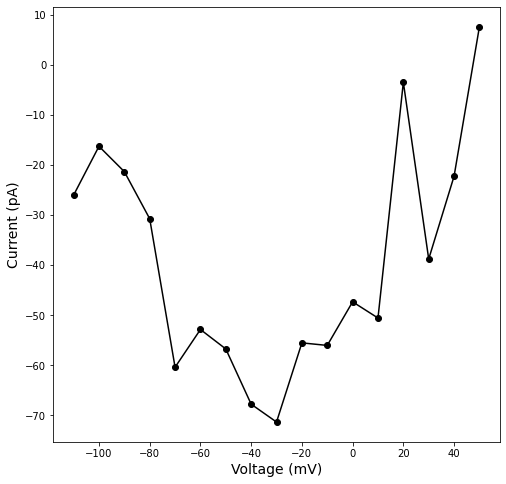

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_9.asc


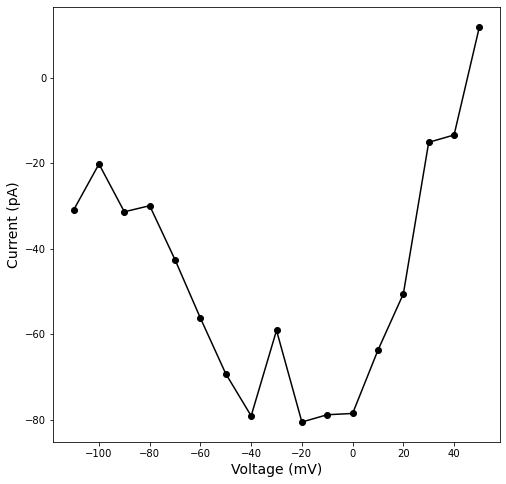

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_12.asc


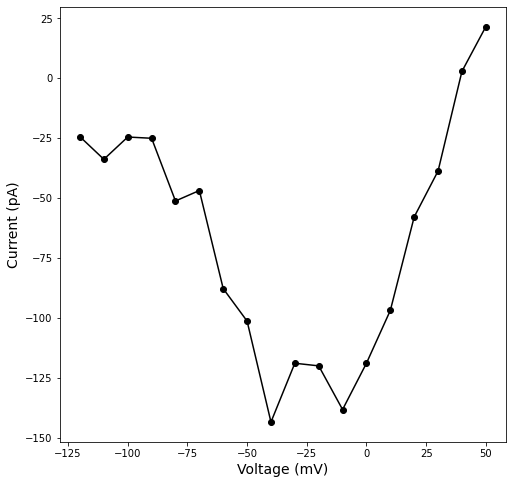

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_2.asc


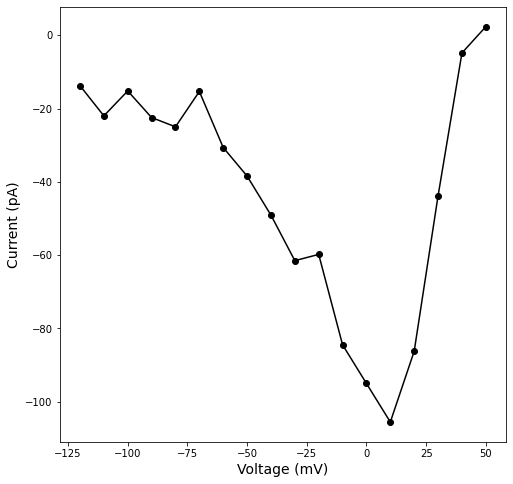

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_3.asc


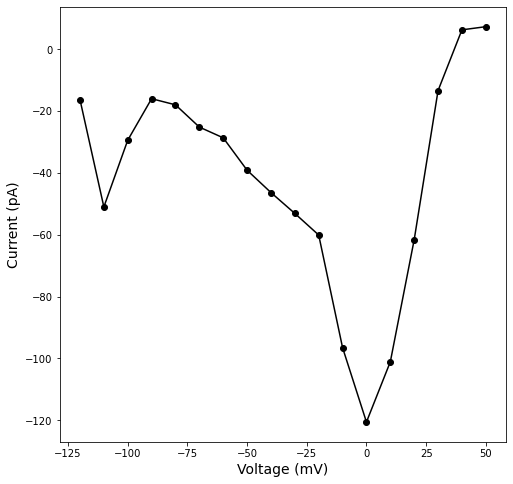

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_4.asc


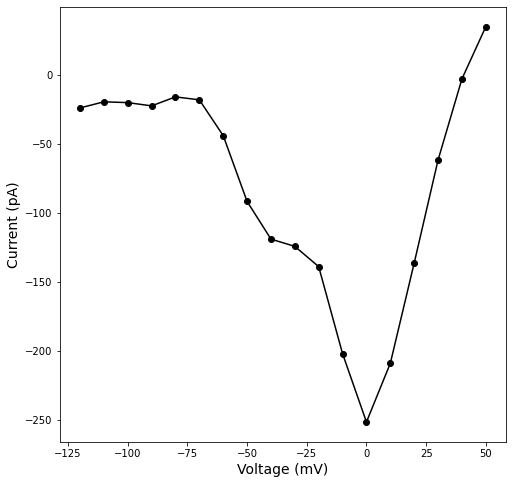

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_5.asc


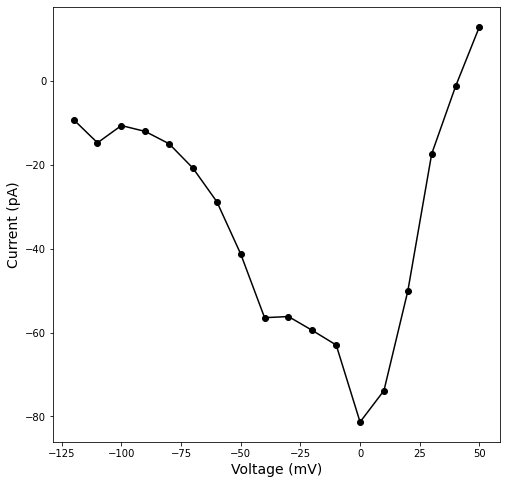

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_6.asc


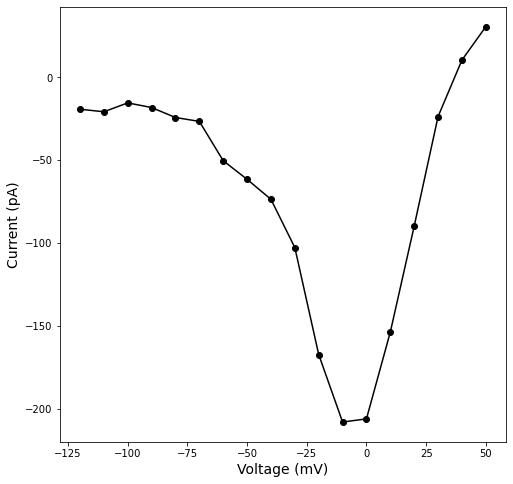

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_7.asc


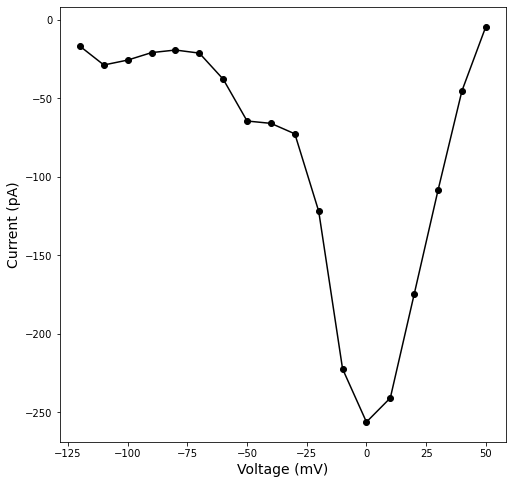

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_8.asc


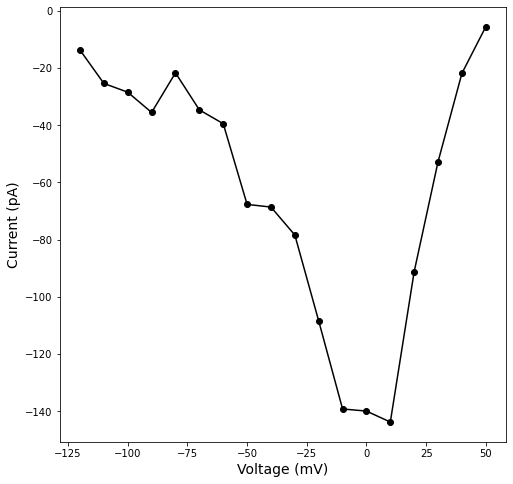

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_2.asc


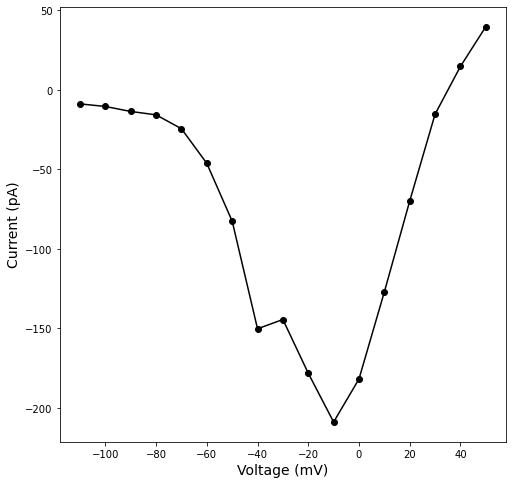

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_4.asc


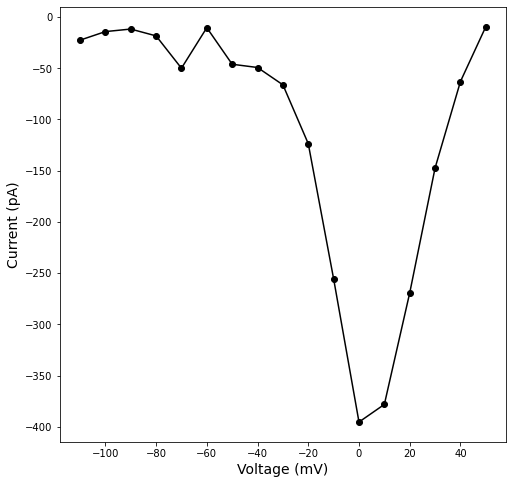

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_5.asc


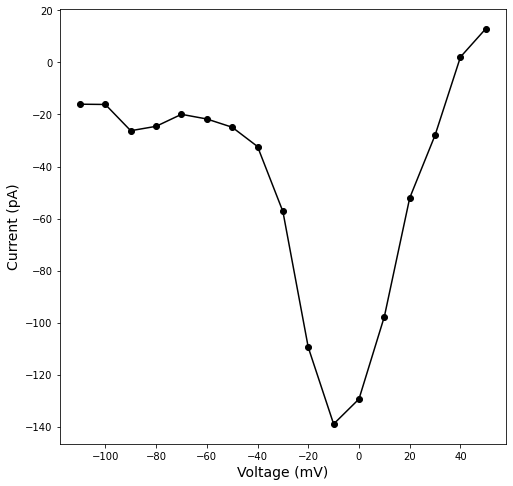

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_6.asc


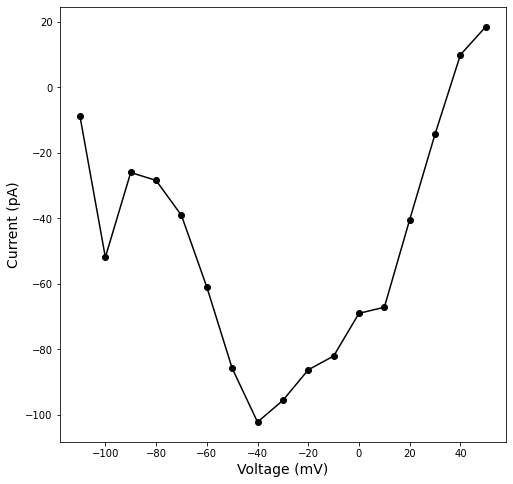

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_18.asc


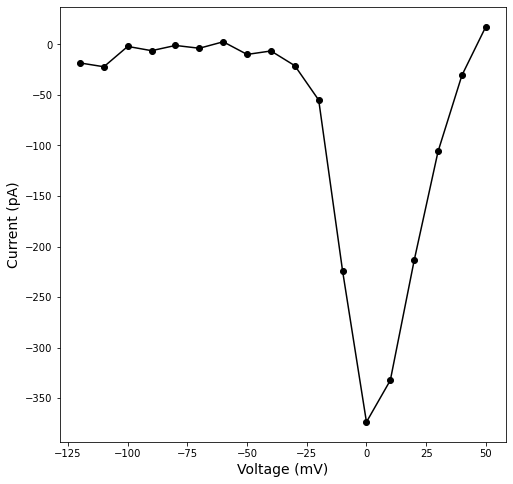

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_20.asc


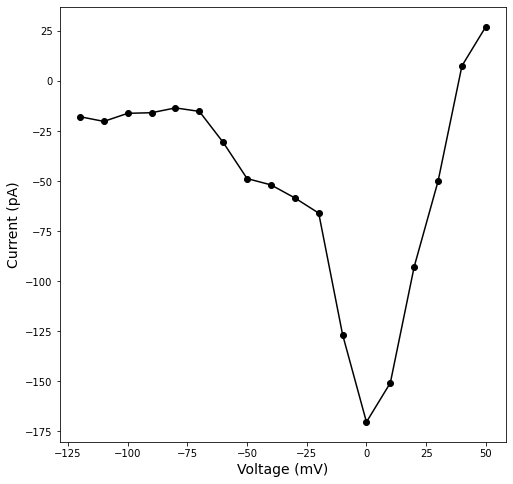

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_21.asc


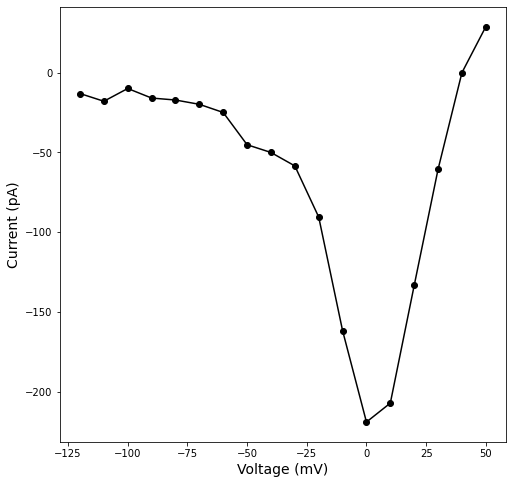

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_22.asc


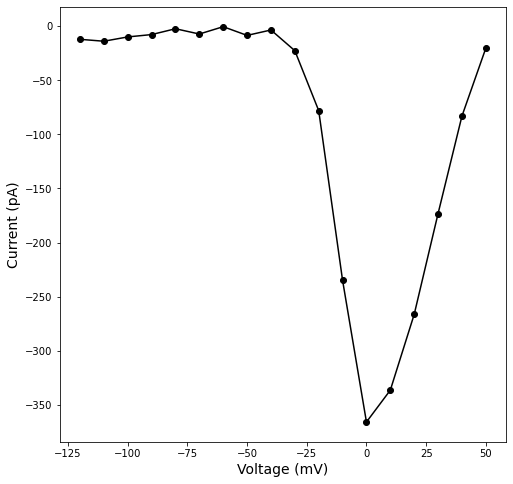

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_23.asc


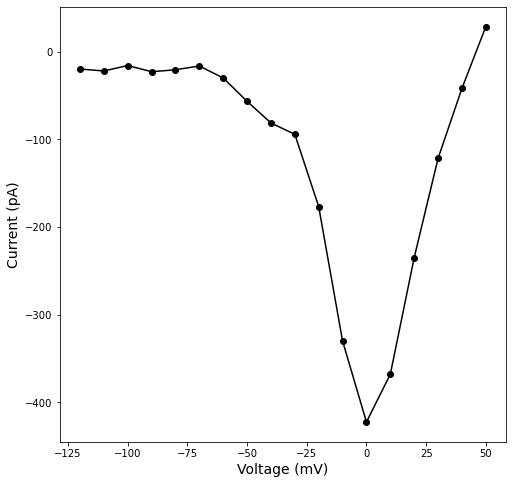

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_24.asc


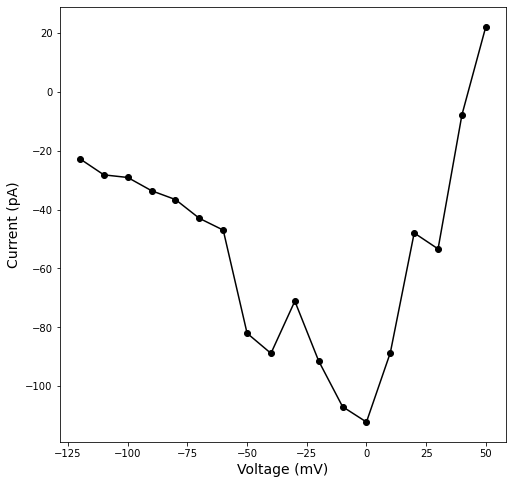

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_02.asc


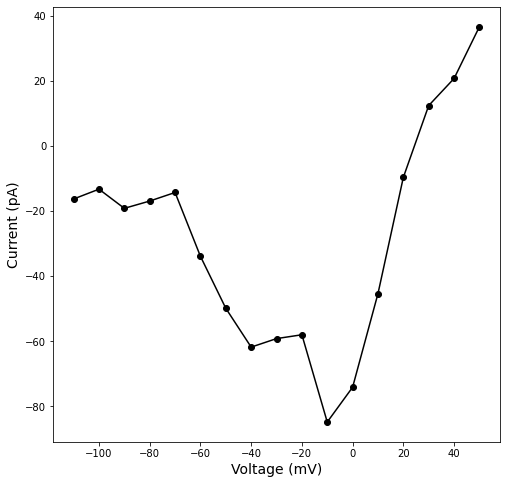

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_03.asc


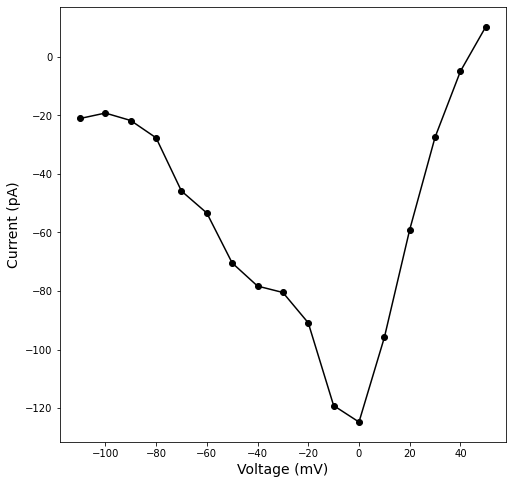

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_04.asc


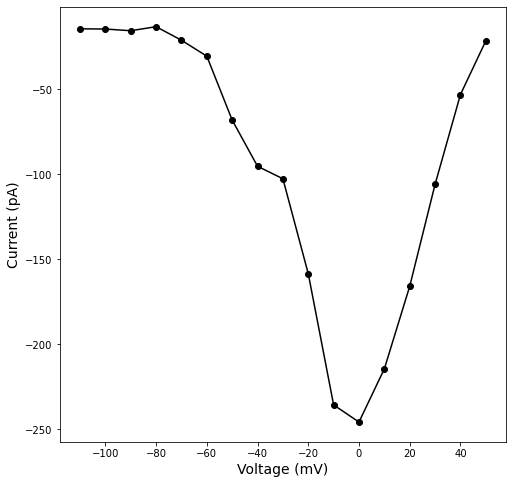

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_05.asc


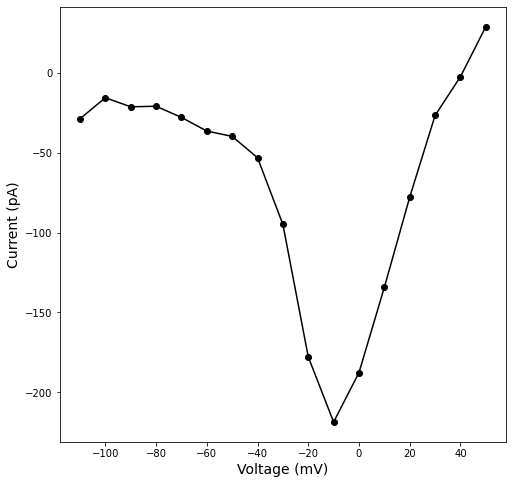

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_06.asc


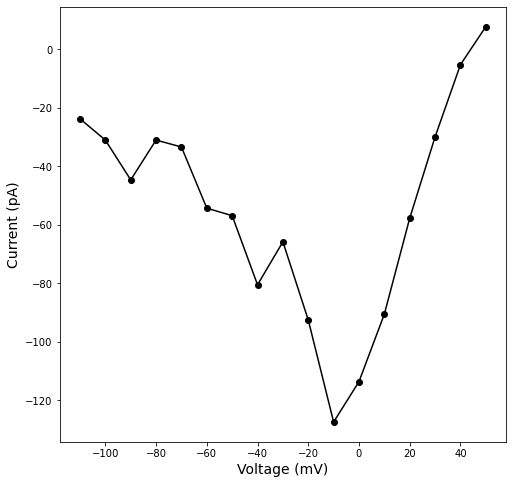

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_11.asc


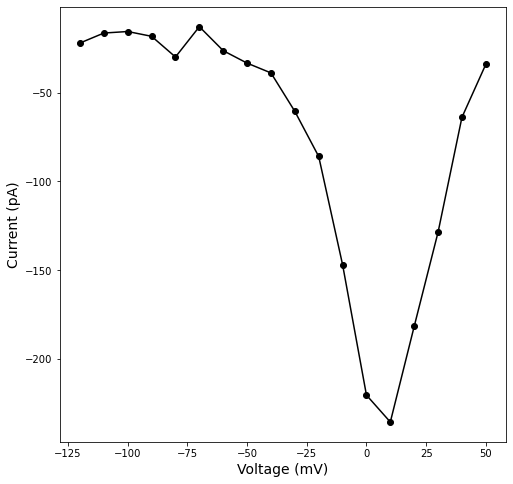

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_12.asc


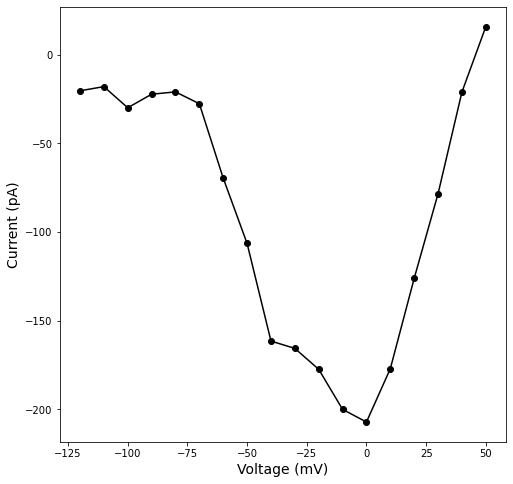

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_13.asc


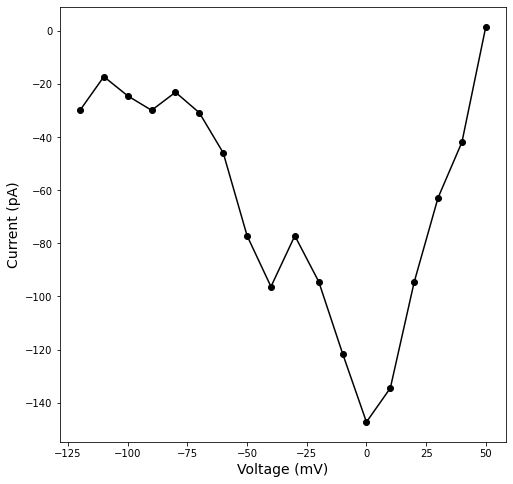

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_14.asc


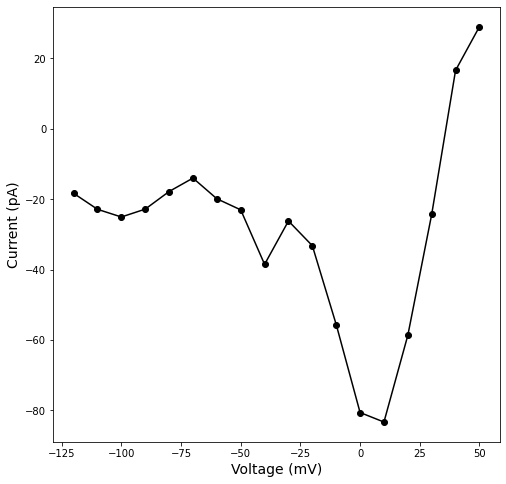

In [88]:
iv_currents = []
for root, dirs, files in os.walk(iv_path):
    if 'dpi' in root:
        for file in files:
            filepath = os.path.join(root, file)
            print(filepath)
            iv = IV(filepath)
            iv.plot_iv()
            if len(iv.iv_current) == 18:
                iv_currents.append(iv.iv_current[1:])
            else:
                iv_currents.append(iv.iv_current)
iv_voltage = np.int8(iv.iv_voltage[1:])

In [167]:
count = 0
for iv_current in iv_currents:
    if np.any(np.array(iv_current) < -100):
        count += 1
    
hundred = count/len(iv_currents)

count = 0
for iv_current in iv_currents:
    if np.any(np.array(iv_current) < -200):
        count += 1
    
twohundred = count/len(iv_currents)

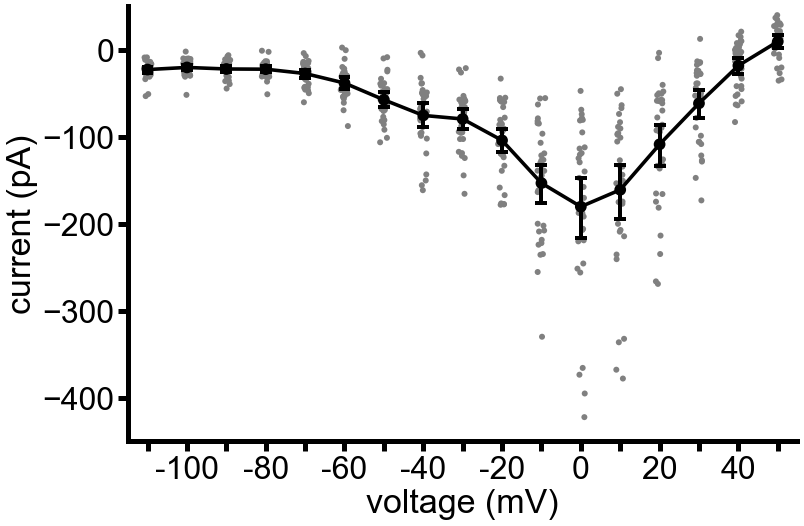

In [166]:
plt.figure(figsize=(12,8))

ax = plt.gca()
#ax.set_xlim([-10,0])
ax.set_ylim([-450, 50])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 1}                  
sns.set_context("paper", rc = paper_rc) 

sns.stripplot(data=np.array(iv_currents), color='gray', zorder=0, size=6)
sns.pointplot(data=np.array(iv_currents), capsize=.2, color='k', zorder=1, errwidth=4)
ax.set_xticklabels(iv_voltage, fontname="Arial", fontsize=32)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)


plt.xlabel('voltage (mV)', fontsize=34, fontname='Arial')
plt.ylabel('current (pA)', fontsize=34,fontname='Arial')


plt.savefig('IV_with_dots.png', bbox_inches = "tight")  
plt.show()

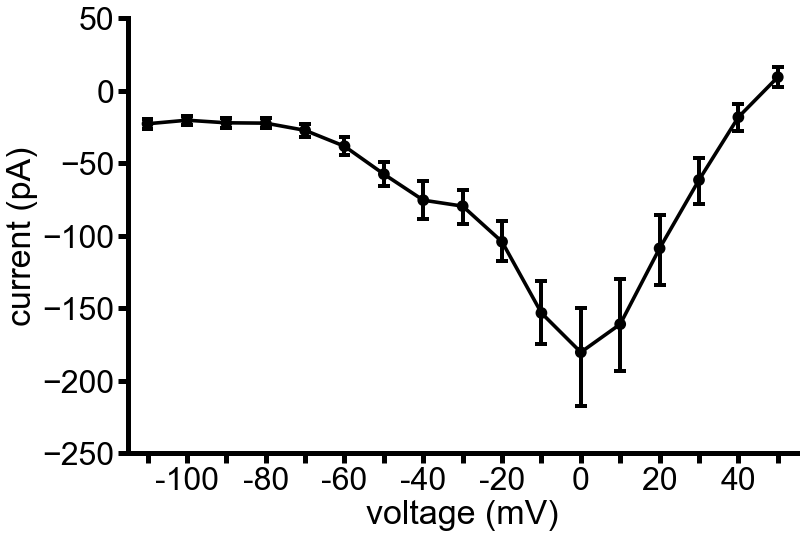

In [164]:
plt.figure(figsize=(12,8))

ax = plt.gca()
#ax.set_xlim([-10,0])
ax.set_ylim([-250, 50])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 1}                  
sns.set_context("paper", rc = paper_rc) 

#sns.stripplot(data=np.array(iv_currents), color='gray', zorder=0)
sns.pointplot(data=np.array(iv_currents), capsize=.2, color='k', zorder=1, errwidth=4)
ax.set_xticklabels(iv_voltage, fontname="Arial", fontsize=32)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)




plt.xlabel('voltage (mV)', fontsize=34, fontname='Arial')
plt.ylabel('current (pA)', fontsize=34,fontname='Arial')


plt.savefig('IV_all.png', bbox_inches = "tight")  
plt.show()

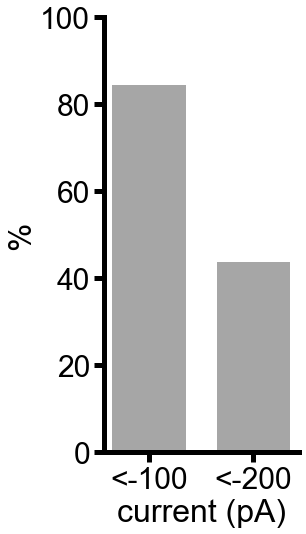

In [187]:
name = 'TTX res. cells'

plt.figure(figsize=(14/4,8))
# Data
r = [0,1]
linewidth=5
# From raw value to percentage
TTX_res = np.array([hundred, twohundred])*100

# plot
barWidth = 0.7
names = ['<-100', '<-200']

plt.bar(r, TTX_res, color='gray', width=barWidth, label='0 AP', alpha=0.7)


# Custom x axis
fontsize = 30
ax=plt.gca()
ax.set_ylim([0, 100])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(linewidth)
ax.spines['bottom'].set_linewidth(linewidth)
plt.tick_params(length=10, width=5)
plt.xticks(r, names)
plt.xticks(fontname="Arial", fontsize=fontsize)
plt.yticks(fontname="Arial", fontsize=fontsize)



plt.ylabel('%', fontname="Arial", fontsize=32)
plt.xlabel('current (pA)', fontname="Arial", fontsize=32)

plt.savefig(name+'.png', bbox_inches = "tight")
# Show graphic
plt.show()
